## LendingClub loan data

In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
lc_data = pd.read_csv("./accepted_2007_to_2018Q4.csv", low_memory=False)
lc = lc_data.copy(deep=True)

In [3]:
lc.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that the last two rows of this dataset should be discarded.

In [3]:
lc = lc[:-2]

In [11]:
pd.set_option('display.max_columns', None)
lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

From the first five rows, we can see that there are many features with missing data, as well as many categorical features. We anticipate at least some of them to be important, in particular the subgrade (ordinal) and title (nominal) features, the former dividing the grade into finer categories and the latter being the motivation behind the borrower. At the same time, there are categories such as the URL, ID, member ID, and enployment title which can be discarded. Since this dataset is specifically of loans which were fully funded by investors, funded_amnt_inv should be redundant with funded_amnt; we make sure to check that features which are expected to be redundant are actually redundant.

In [9]:
ls_description = pd.read_excel("./LCDataDictionary.xlsx").dropna()
ls_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


We list the percentage of missing data in each feature, following Pragyan Subedi:

In [6]:
def null_values(lc, return_table=True):
    mis_val = lc.isnull().sum()
    mis_val_percent = 100 * mis_val / len(lc)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(4)
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
    if return_table:
        return mis_val_table_ren_columns

In [7]:
miss_values = null_values(lc)
pd.set_option('display.max_rows', None)
miss_values

There are 150 columns that have missing values.


,Missing Values,% of Total Values
member_id,2260699,100.0000
orig_projected_additional_accrued_interest,2252048,99.6173
hardship_dpd,2249782,99.5171
hardship_status,2249782,99.5171
deferral_term,2249782,99.5171
hardship_amount,2249782,99.5171
hardship_start_date,2249782,99.5171
hardship_end_date,2249782,99.5171
payment_plan_start_date,2249782,99.5171
hardship_length,2249782,99.5171


In [4]:
lc.isnull().any()

id                       False
member_id                 True
loan_amnt                 True
funded_amnt               True
funded_amnt_inv           True
                         ...  
settlement_status         True
settlement_date           True
settlement_amount         True
settlement_percentage     True
settlement_term           True
Length: 151, dtype: bool

Missing values are in every feature except for ID, with the minimum being 31. Because there are so many features with 31 missing data points, we will have to remove these 31 rows. There are also many features with over 90% of the data missing, so it is likely that we will eventually need to drop these as well.

In [8]:
lc = lc[pd.notna(lc['loan_status'])]
null_values(lc, return_table=False)

There are 113 columns that have missing values.


## Loan default predictions

A classic problem that any institution offering loans seeks to solve is how to minimize losses by minimizing the amount of loans offered that eventually default. Our target variable is therefore loan_status (42 in the dictionary), and we are seeking those that have gone into default or are charged-off. We treat these two in the same way because we assume that every loan that has been charged-off also went into default.

In [9]:
lc['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

We see above that there are three categories that fit this criteria. We will have to make sure that all three categories in target_list are the same. According to [Fred93 (2014)](https://forum.lendacademy.com/?topic=2427.msg20813#msg20813), the exact explanation for the "does not meet the credit policy" categories is unclear, but we find it reasonable to treat them the same way as the regular categories. For simplicity, we treat delinquent loans late by <120 days in the same manner as those that are current or are fully paid off. Later on, the loan status will be treated ordinally.

In [11]:
target_categories = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']
target_list = [1 if i in target_categories else 0 for i in lc['loan_status']]
lc.drop('loan_status', axis=1, inplace=True)
lc['target'] = target_list
lc['target'].value_counts()

0    1991308
1     269360
Name: target, dtype: int64

The target is a bit unbalanced, with only about 12% of loans in default.

In [15]:
lc.select_dtypes('object').apply(pd.Series.nunique, axis=0)

id                           2260668
term                               2
grade                              7
sub_grade                         35
emp_title                     512694
emp_length                        11
home_ownership                     6
verification_status                3
issue_d                          139
pymnt_plan                         2
url                          2260668
desc                          124501
purpose                           14
title                          63155
zip_code                         956
addr_state                        51
earliest_cr_line                 754
initial_list_status                2
last_pymnt_d                     136
next_pymnt_d                     106
last_credit_pull_d               141
application_type                   2
verification_status_joint          3
sec_app_earliest_cr_line         663
hardship_flag                      2
hardship_type                      1
hardship_reason                    9
h

Each of these will have a different operation applied to them. For example, "term" and "pymnt_plan" will be binary, "grade" will be ordinal, and several others like "id", "url", and "desc" will be dropped because we expect that no insights will be gained by keeping these, while any category starting with "hardship_" or "settlement_" will be dropped because these categories have too high a percentage of missing values.

Now we visualize the data. For example, one of the most obvious things to graph is histograms of interest rates and FICO credit scores. We also would like information on payment plans and employment times.

The majority of the loans have interest rates around 5-20%, with a chart that is skewed right.

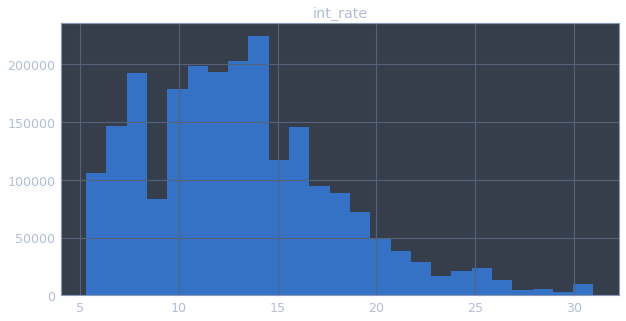

In [47]:
lc.hist(column=['int_rate'], bins=25, figsize=(10, 5));

In [77]:
print("Initial FICO range cutoff: ", lc['fico_range_low'].min())
print("Last FICO range minimum: ", lc['last_fico_range_high'].min())
lastficohigh_below300 = [i for i in lc['last_fico_range_high'] if i < 300]
lastficolow_below300  = [i for i in lc['last_fico_range_low'] if i < 300]
print(len(lastficohigh_below300), ", ", len(lastficolow_below300))

Initial FICO range cutoff:  610.0
Last FICO range minimum:  0.0
235 ,  37326


We see that prior to being issued the loan, almost all borrowers have FICO credit scores above 620, though some of their last recorded FICO credit scores fell below 620, or the threshold to be considered subprime, suggesting that LendingClub made a hard cutoff there when deciding on loan applications. This point is also illustrated by the two histograms on the left. We expect a Gaussian distribution for FICO scores, and while the right end gradually falls off, the left falls off much sharper.

The FICO credit score range is (300, 850). Those that are below in the "last_fico_range_high" and "last_fico_range_low" categories should be brought to note.

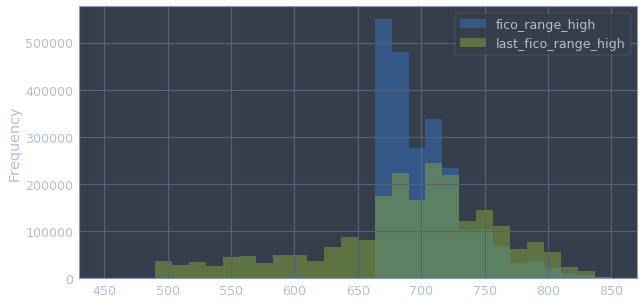

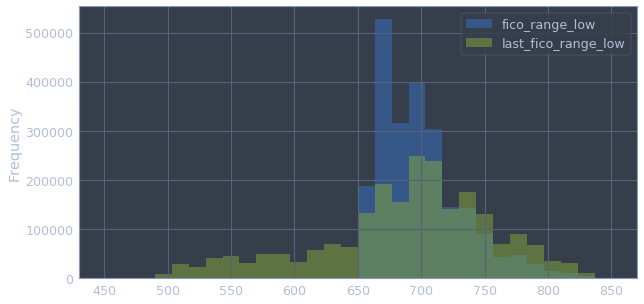

In [67]:
lc[['fico_range_high', 'last_fico_range_high']].plot.hist(range=[450,850], bins=30, alpha=0.5, figsize=(10, 5));
lc[['fico_range_low', 'last_fico_range_low']].plot.hist(range=[450,850], bins=30, alpha=0.5, figsize=(10, 5));

There are two things to keep in mind with employment years: missing values (6.5% missing), and the fact that the relatively high amount of borrowers with employment of 10+ years is reflected in the fact that every borrower with such an employment history is put into one category. In fact, we see that given the bottom several bars, the trend is that those who have been employed longer are slightly less likely to obtain a loan. In contrast, there are more loans issued to those with 3 or less years of employment.

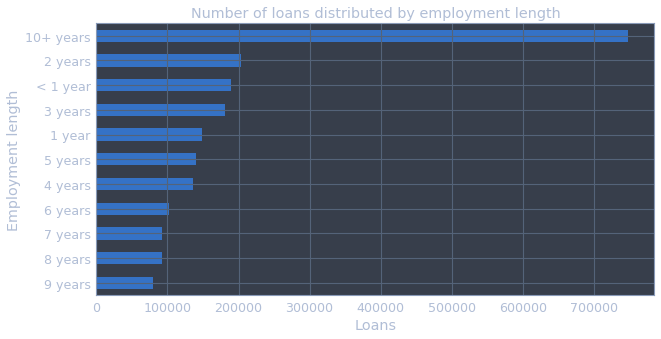

In [59]:
lc['emp_length'].value_counts().sort_values().plot.barh(figsize=(10, 5))
plt.title("Number of loans distributed by employment length")
plt.xlabel("Loans")
plt.ylabel("Employment length");

## Portfolio optimization

As a peer-to-peer lending platform, LendingClub loans are funded by investors. A central goal of any investor is how to optimize their portfolio for maximum returns. Unlike predicting loan defaults, this problem is complicated by a number of factors, including but not limited to:

1. From a probabilistic perspective, a loan can default at any time in the payment schedule, at a partial loss for the investor.
2. The investor does not have access to every single feature in this dataset.
3. The investor can only make a decision on whether to invest in a loan at the initial time. Once an investment is made, it must either mature to the loan expiration date (36 or 60 months after issuance), or at least part of it will be lost due to default. This has some similarities to investing in derivative securities, although there is no hedging strategy that an investor can create to protect themselves from loan defaults.
4. Interest rates vary with time, but the investor only has access to loans of different grades.
5. The minimum investment in a single loan is \\$25, but the weights assigned to each loan will be continuous. This discretization matters more the smaller the portfolio.
6. To date, LendingClub no longer offers loans that are of E grade or riskier. The loans of these grades in the dataset cannot be taken into account in the decision of the investor today. For our purposes, we will do the same on the most recent loans that were fully paid off or went into default.
7. There are loans in the dataset that are still in issuance. The earlier they were issued, the more uncertainty there is to whether the borrower will continue to follow the repayment schedule. According to LendingClub statistics, there are a significant number of current loans whose current payment is late that eventually go into default.
8. There are additional complications to the normal payment schedule. The most common is probably delinquency, but a few also have hardship schedules.
9. When one invests in actual loans on LendingClub at a given time, there are a limited amount of loans at that time to invest in. In our analysis, this point will likely be ignored at first. We may take this into account later ― it will amplify the effects of discretization (cf. point 5).
10. The performance will primarily be measured through the difference between the theoretical (if every borrower follows their normal payment schedules, with no delinquencies) and actual returns, the latter of which will also depend on macroeconomic indicators such as CPI.